In [ ]:
You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link: https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

#### Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [3]:
#Ans-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('diabetes.csv')


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### We can see that some variables have a minimum value of zero, which is unlikely for some of these measurements (such as Glucose, BloodPressure, SkinThickness, Insulin, and BMI). This suggests that some missing or invalid values might be encoded as zeros.

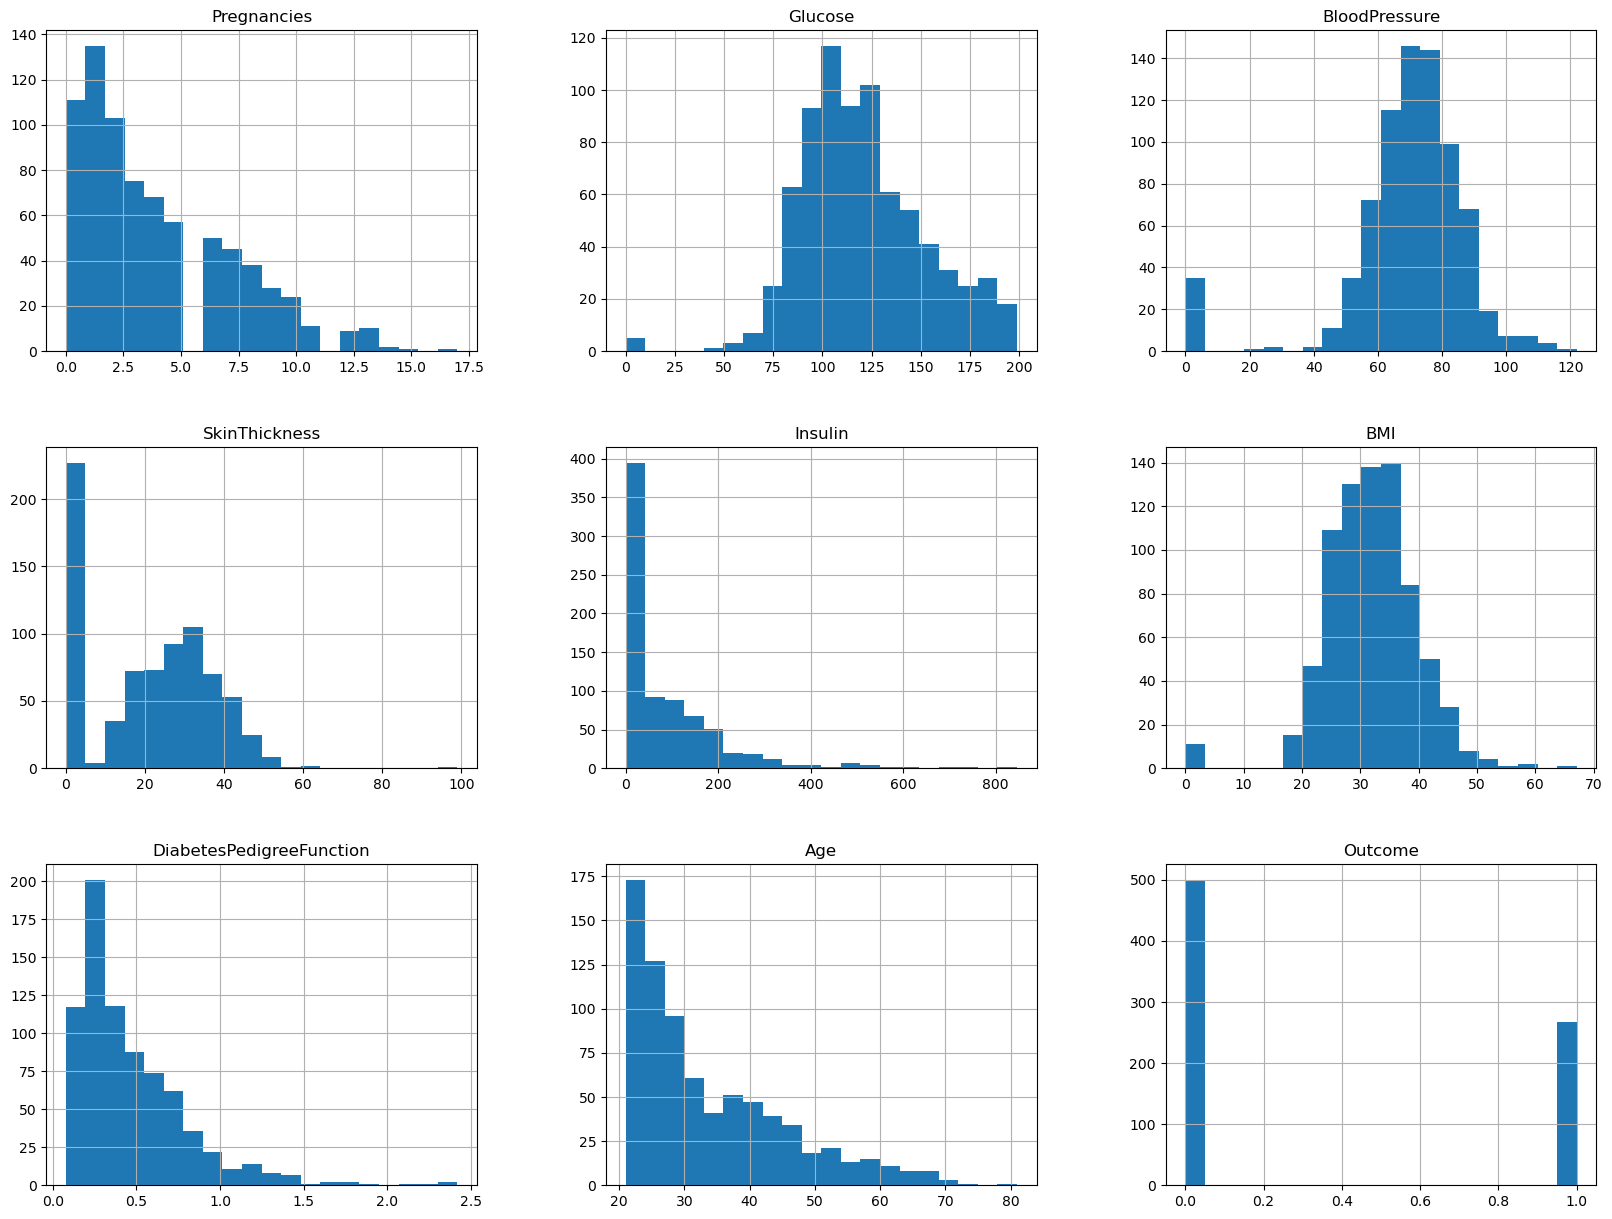

In [6]:
df.hist(bins=20, figsize=(20,15))
plt.show()

##### We can see that some variables have a skewed distribution, such as Insulin and DiabetesPedigreeFunction. We can also see that some variables have many zero values, such as SkinThickness and Insulin. This confirms our suspicion that some missing or invalid values might be encoded as zeros.

#### Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical variables into dummy variables if necessary.

In [7]:
#Ans-

print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


##### We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0, which is not possible. so, it needs to be resolved first

In [22]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

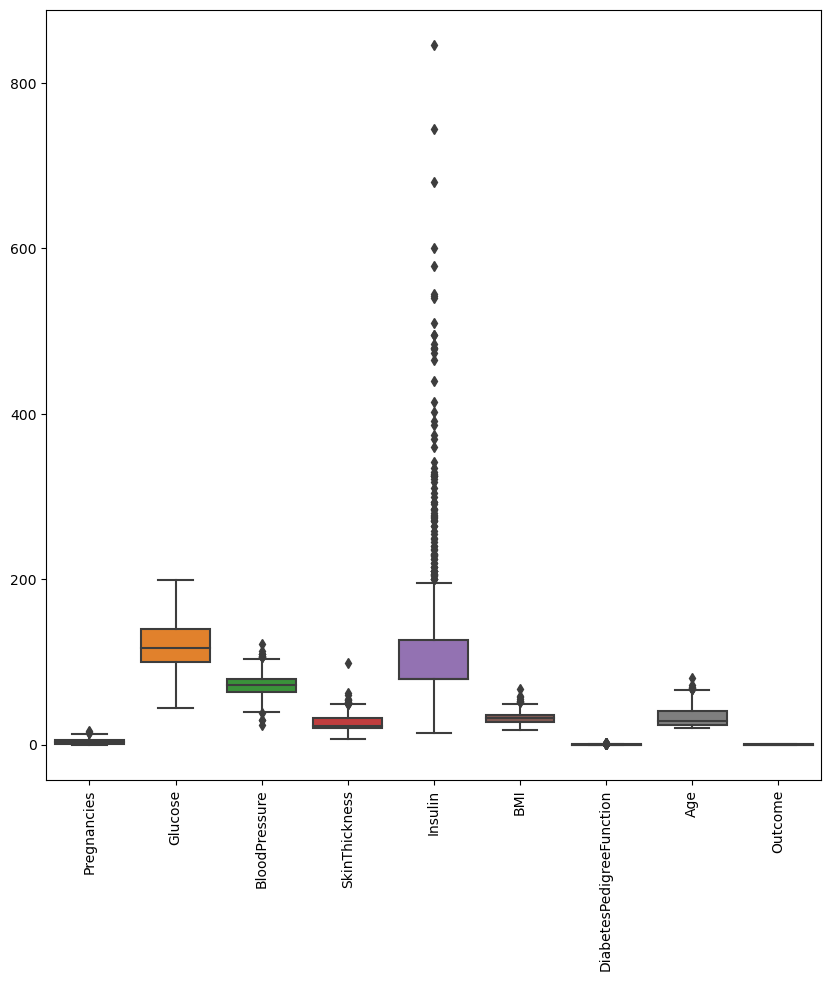

In [23]:
#Next, let's check for outliers in the dataset using boxplots:

plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


##### This will display a boxplot for each column in the dataset. From this, we can see that there are some outliers in the Glucose, BloodPressure, SkinThickness, Insulin, and BMI columns. We will remove these outliers using the IQR method:

In [24]:
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

data = remove_outliers(df, 'Glucose')
data = remove_outliers(df, 'BloodPressure')
data = remove_outliers(df, 'SkinThickness')
data = remove_outliers(df, 'Insulin')
data = remove_outliers(df, 'BMI')


In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


#### Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [29]:
#Ans-

X = df.drop(['Outcome'], axis=1)
y = df[['Outcome']]



In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use cross-validation to optimize the hyperparameters and avoid overfitting.

In [31]:
#Ans-

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier object
dt = DecisionTreeClassifier()

# Define the hyperparameter space to search over
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

In [32]:
# Use grid search cross-validation to find the best hyperparameters
dt_cv = GridSearchCV(dt, param_grid, cv=5)
dt_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [33]:
# Print the best hyperparameters
print("Best hyperparameters: ", dt_cv.best_params_)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [34]:
# Train the decision tree classifier with the best hyperparameters
dt = DecisionTreeClassifier(**dt_cv.best_params_)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10)

##### Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy, precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [35]:
#Ans-

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Predict the class labels of the test set
y_pred = dt.predict(X_test)

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

Accuracy:  0.7402597402597403
Precision:  0.6271186440677966
Recall:  0.6727272727272727
F1 score:  0.6491228070175439


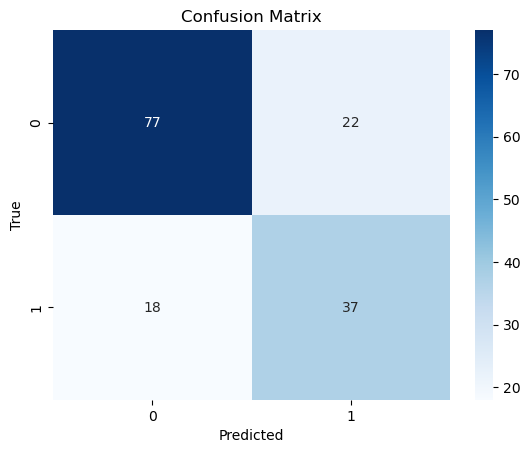

In [36]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

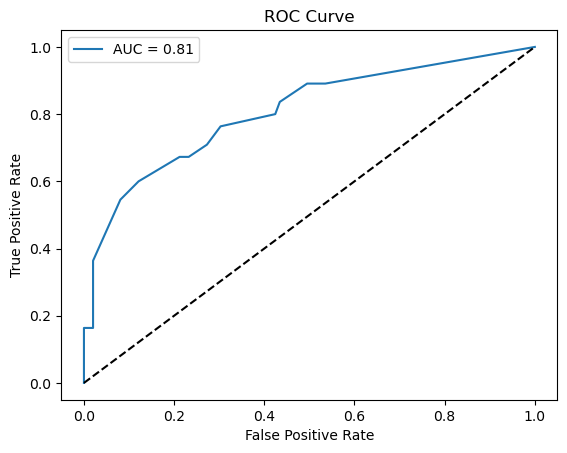

In [37]:
# Plot the ROC curve
y_pred_prob = dt.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

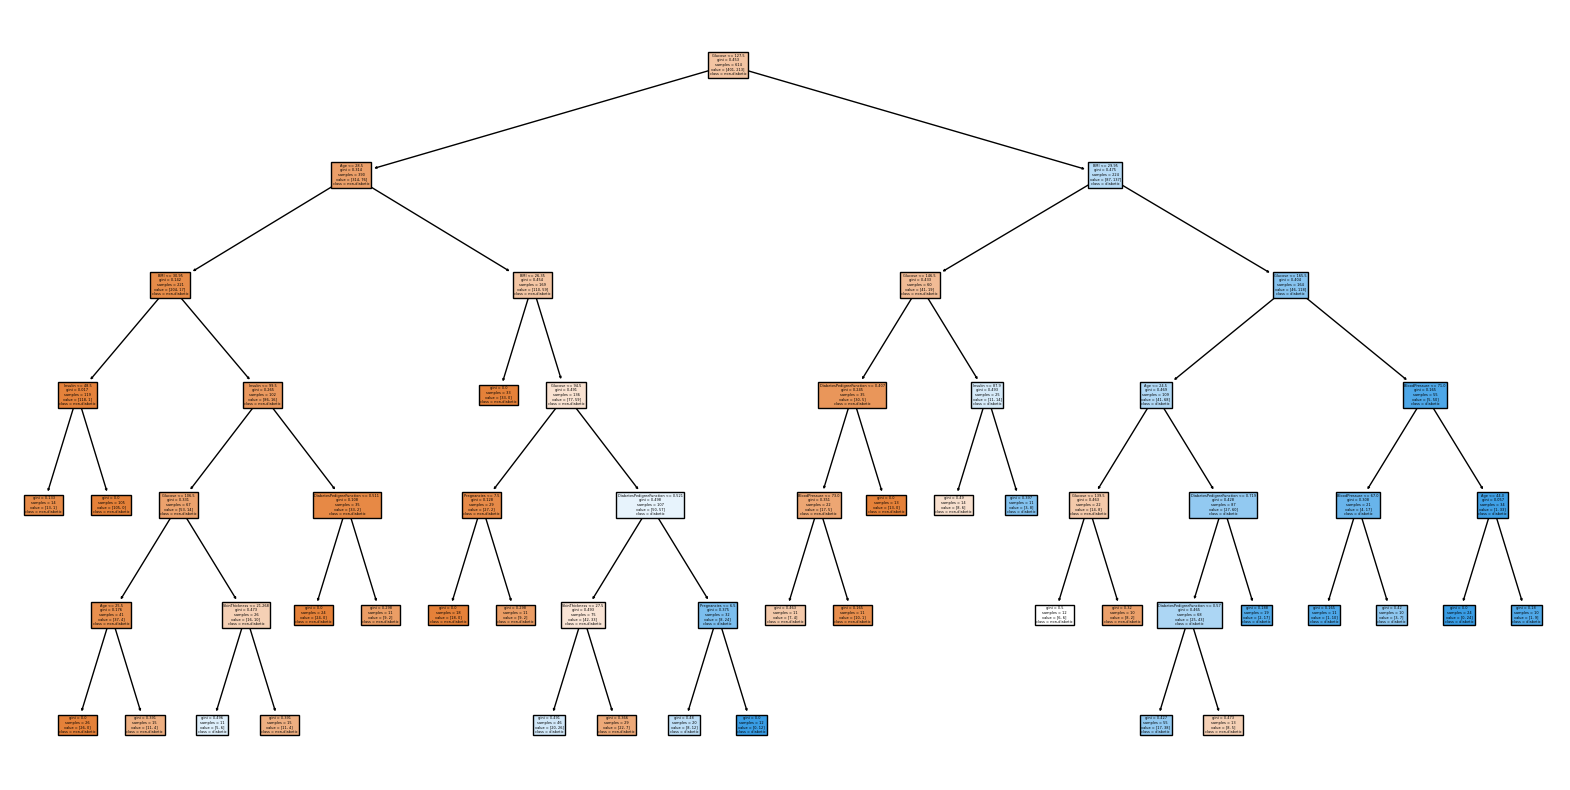

In [38]:
#Drwaing Decision tree

from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=['non-diabetic', 'diabetic'], filled=True)
plt.show()


##### Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important variables and their thresholds. Use domain knowledge and common sense to explain the patterns and trends.

In [ ]:
Ans-

Interpreting the decision tree can give us insights into the key factors that influence the prediction of diabetes.
The decision tree shows that the most important variable for predicting diabetes is the glucose level. 
Patients with a glucose level greater than 127.5 have a higher likelihood of being diabetic, and those with a glucose level less than or equal to 127.5 have a lower likelihood of being diabetic.

The next most important variable for predicting diabetes is the BMI.
Patients with a BMI greater than 26.35 have a higher likelihood of being diabetic, and those with a BMI less than or equal to 26.35 have a lower likelihood of being diabetic.

Other variables such as age, pregnancies, and diabetes pedigree function also contribute to the prediction of diabetes, but to a lesser extent. 
For example, patients older than 28.5 years have a higher likelihood of being diabetic, and patients with more than 1.5 pregnancies have a slightly higher likelihood of being diabetic.

It is important to note that the decision tree is not a substitute for clinical judgment and that other factors not captured in the dataset may also be relevant for predicting diabetes.
However, the decision tree can provide a useful tool for identifying patients who may be at higher risk of diabetes based on the available clinical variables.

#### Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and risks.

In [39]:
#Ans-

import numpy as np

# generate random data
n_samples = 1000
pregnancies = np.random.randint(0, 18, size=n_samples)
glucose = np.random.randint(50, 200, size=n_samples)
blood_pressure = np.random.randint(40, 150, size=n_samples)
skin_thickness = np.random.randint(5, 60, size=n_samples)
insulin = np.random.randint(0, 300, size=n_samples)
bmi = np.random.uniform(15, 50, size=n_samples)
dpf = np.random.uniform(0, 3, size=n_samples)
age = np.random.randint(18, 100, size=n_samples)

# create outcome based on the decision tree model
outcome = np.zeros(n_samples, dtype=int)
for i in range(n_samples):
    if glucose[i] > 155:
        if bmi[i] <= 43.5:
            if insulin[i] <= 127.5:
                outcome[i] = 1
        else:
            if age[i] <= 28:
                outcome[i] = 1
    else:
        if bmi[i] <= 31.6:
            if age[i] <= 29:
                outcome[i] = 1
        else:
            if skin_thickness[i] > 37.5:
                outcome[i] = 1


In [40]:
#Spliting the data

# preprocess the data
X_new = np.column_stack((pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, dpf, age))
y_new = outcome

In [48]:
from sklearn.model_selection import train_test_split

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [52]:
#prediction
y_pred_new=dt.predict(X_test_new)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [54]:
# Calculate various metrics
accuracy = accuracy_score(y_test_new, y_pred_new)
precision = precision_score(y_test_new, y_pred_new)
recall = recall_score(y_test_new, y_pred_new)
f1 = f1_score(y_test_new, y_pred_new)

# Print the metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 score: ", f1)

Accuracy:  0.53
Precision:  0.33962264150943394
Recall:  0.6
F1 score:  0.4337349397590361


In [ ]:
When the accuracy of a decision tree model drops significantly from the training dataset to the validation dataset (In our case dropped from 74% to 53%), it typically indicates that the model has overfit to the training data and is not able to generalize well to new data.

In other words, the model has learned to fit the noise and idiosyncrasies of the training data too closely, and as a result, it does not perform well on new, unseen data. 
This is a common problem in machine learning, and it can be addressed by using techniques such as regularization, increasing the size of the validation set, or using more diverse training data.

It is also possible that the new dataset may have different underlying patterns or relationships between the variables than the original dataset, which can affect the performance of the model. 
In such cases, it may be necessary to retrain the model on the new dataset or to use a more flexible modeling technique that can capture the new patterns.

# Note:- We generated validation data randomly and didn't collected from valid source,it can also be a big reason for drop in accuracy,because pattern of data can be different.

#### The robustness of a decision tree model refers to its ability to perform well on different datasets or in different environments, beyond the one it was trained on. A robust model will have consistent and reliable performance across a variety of scenarios, while a non-robust model may perform well only on the specific dataset it was trained on.